In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [2]:
train_data_dir = 'dataset/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1988 images belonging to 5 classes.
Found 493 images belonging to 5 classes.


In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

In [4]:
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu', kernel_initializer='glorot_uniform'),
    Dropout(0.5),
    Dense(5, activation='softmax', kernel_initializer='glorot_uniform')  # Output layer with 5 units for 5 activities
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

C:\Users\pande\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch 1/10


C:\Users\pande\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 320s 5s/step - accuracy: 0.4576 - loss: 1.3878 - val_accuracy: 0.7850 - val_loss: 0.6377
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 304s 5s/step - accuracy: 0.7084 - loss: 0.7830 - val_accuracy: 0.8073 - val_loss: 0.5282
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 308s 5s/step - accuracy: 0.7785 - loss: 0.6095 - val_accuracy: 0.8114 - val_loss: 0.5256
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 330s 5s/step - accuracy: 0.8142 - loss: 0.5472 - val_accuracy: 0.8296 - val_loss: 0.4445
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 333s 5s/step - accuracy: 0.8520 - loss: 0.4334 - val_accuracy: 0.8499 - val_loss: 0.4292
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 327s 5s/step - accuracy: 0.8621 - loss: 0.4245 - val_accuracy: 0.8357 - val_loss: 0.4651
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 325s 5s/step - accuracy: 0.8596 - loss: 0.3968 - val_accuracy: 0.8803 - val_loss: 0.3716
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 326s 5s/step - accuracy: 0.8970 - loss: 0.3175 - val_accuracy: 0.8600 - val_loss: 0.

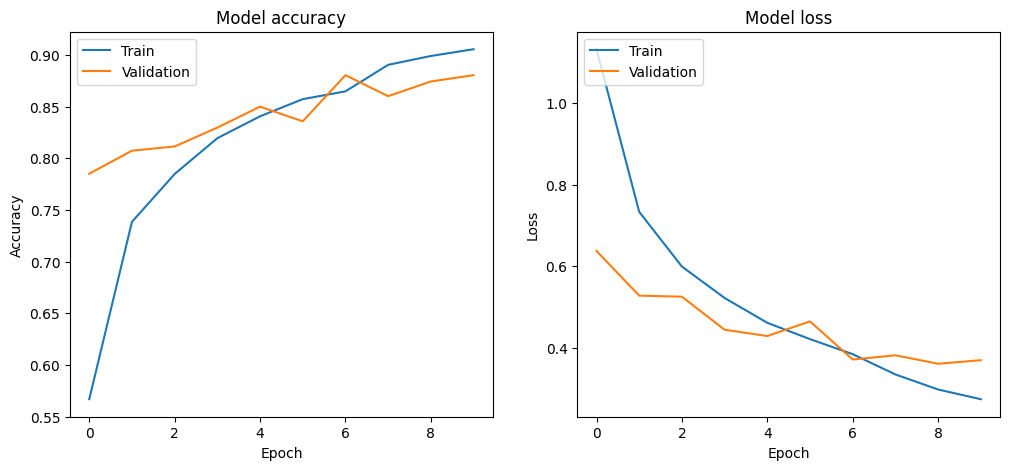

In [6]:
import matplotlib.pyplot as plt

# Assuming `history` is the History object returned by model.fit()

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
